In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve



In [2]:

# Load and prepare data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Binary classification: Setosa vs Not-Setosa
df['binary_target'] = (df['target'] != 0).astype(int)
df['binary_target_name'] = df['binary_target'].map({0: 'Setosa', 1: 'Not Setosa'})



In [3]:
# Split data
X = df[iris.feature_names]
y = df['binary_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]


In [5]:
# 1. Confusion Matrix Plot using Heatmap
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual Not Setosa', 'Actual Setosa'], # Corrected order
                     columns=['Predicted Not Setosa', 'Predicted Setosa']) # Corrected order

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('results/confusion_matrix_heatmap.png')
plt.close()

# 2. Precision-Recall Curve Plot
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (PPV)')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.savefig('results/precision_recall_curve.png')
plt.close()

print("Visualizations saved in results/ directory")

Visualizations saved in results/ directory


### Explaination for confusion matrix and classification report

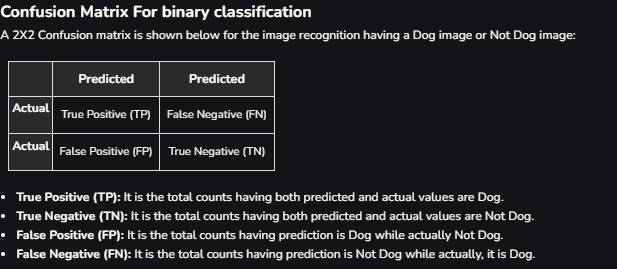

#### There are four ways to check if the predictions are right or wrong:

#### TN / True Negative: the case was negative and predicted negative
#### TP / True Positive: the case was positive and predicted positive
#### FN / False Negative: the case was positive but predicted negative
#### FP / False Positive: the case was negative but predicted positive
------------------------------------------------------------------
#### Precision — What percent of your predictions were correct?
#### Precision:- Accuracy of positive predictions.
#### Precision = TP/(TP + FP)
-------------------------------------------------------------------------
#### Recall — What percent of the positive cases did you catch?
#### Recall:- Fraction of positives that were correctly identified.
#### Recall = TP/(TP+FN)
--------------------------------------------------------------------------
#### F1 score: What percent of positive predictions were correct?
#### The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
#### F1 Score = 2*(Recall * Precision) / (Recall + Precision)
--------------------------------------------------------------------------
#### Support: Support is the number of actual occurrences of the class in the specified dataset.

About the precision recall curve :


This precision-recall curve shows a classifier that performs exceptionally well at distinguishing one class from the rest. For almost all recall levels (the ability to find all positive instances), the precision (the accuracy of positive predictions) stays at a perfect 1.0. Only when the classifier tries to capture absolutely every single positive instance does the precision drop sharply. This indicates that the positive class is very well-separated from the negative classes, making it an easy classification problem for most thresholds.